# Guide

From https://turing.ml/dev/docs/using-turing/guide

In [1]:
# Import packages.
using Turing
using StatsPlots

# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    x ~ Normal(m, sqrt(s²))
    y ~ Normal(m, sqrt(s²))
end

gdemo (generic function with 1 method)

In [2]:
c6 = sample(gdemo(1.5, 2), NUTS(0.65), 1000)

┌ Info: Found initial step size
│   ϵ = 1.6
└ @ Turing.Inference /home/anatoly/.julia/packages/Turing/YGtAo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 11.16 seconds
Compute duration  = 11.16 seconds
parameters        = s², m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          s²    1.9213    1.5723     0.0497    0.0858   505.3485    0.9995     ⋯
           m    1.1628    0.7531     0.0238    0.0332   562.9168    1.0035     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

        

In [3]:
c6 = sample(gdemo(1.5, 2), NUTS(0.65), 1000)

┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /home/anatoly/.julia/packages/Turing/YGtAo/src/inference/hmc.jl:188


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.07 seconds
Compute duration  = 0.07 seconds
parameters        = s², m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          s²    1.9678    1.7642     0.0558    0.0930   624.2427    1.0014     ⋯
           m    1.1540    0.7991     0.0253    0.0340   546.2422    1.0004     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

In [7]:
# Summarise results
describe(c6)

2-element Vector{ChainDataFrame}:
 Summary Statistics (2 x 8)
 Quantiles (2 x 6)

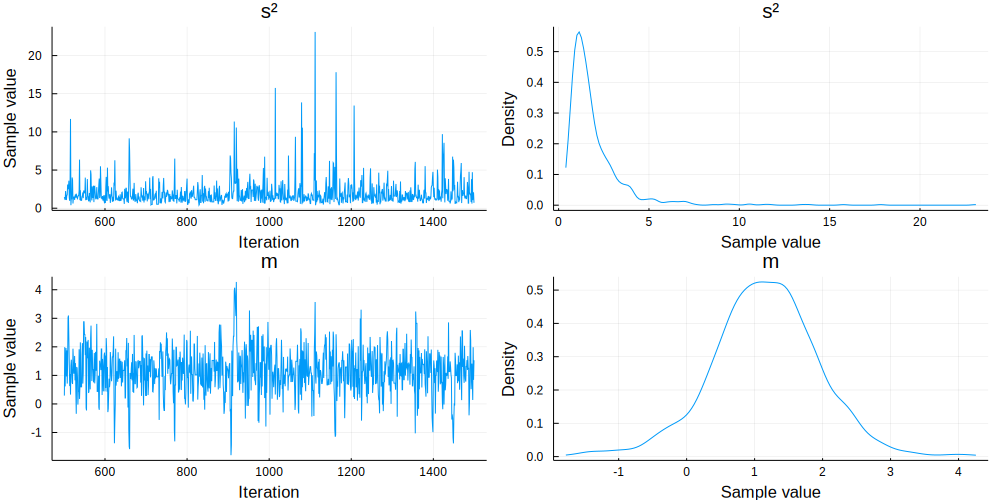

In [8]:
# Plot results
plot(c6)

In [11]:
prior1 = sample(gdemo(missing,missing), Prior(), 100)

Chains MCMC chain (100×5×1 Array{Float64, 3}):

Iterations        = 1:1:100
Number of chains  = 1
Samples per chain = 100
Wall duration     = 0.56 seconds
Compute duration  = 0.56 seconds
parameters        = s², m, y, x
internals         = lp

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Missing    Float64   Float64     ⋯

          s²    3.7489   14.7930     1.4793   missing   102.9374    0.9994     ⋯
           m   -0.1546    1.7968     0.1797   missing    61.8283    1.0225     ⋯
           x   -0.2928    2.8648     0.2865   missing   116.2095    0.9938     ⋯
           y   -0.0904    2.8894     0.2889   missing    84.5198    1.0006     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          s²    0.5540    1.1

In [12]:
@model function generative(x = missing, ::Type{T} = Float64) where {T <: Real}
    if x === missing
        # Initialize x when missing
        x = Vector{T}(undef, 10)
    end
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    for i in 1:length(x)
        x[i] ~ Normal(m, sqrt(s²))
    end
    return s², m
end

m = generative()
chain = sample(m, NUTS(0.7), 1000)

┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /home/anatoly/.julia/packages/Turing/YGtAo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×24×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.51 seconds
Compute duration  = 4.51 seconds
parameters        = x[4], x[1], x[10], x[2], x[3], x[8], x[6], x[7], s², m, x[9], x[5]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          s²    2.7246    3.2487     0.1027    0.3297   100.8884    1.0099     ⋯
           m   -0.0737    1.6601     0.0525    0.1609   129.0700    0.9996     ⋯
        x[1]   -0.0294    2.1988     0.0695    0.1672   257.8986    0.9990     ⋯
        x[2]   -0.1161    2.3051     0.0729    0.1742   208.6566    0.9995     ⋯
        